## Importing the Libraries

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for data analysis
import pandas_profiling as profile
import dabl

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

## Reading the Dataset

In [2]:
# lets import the data
data = pd.read_csv('email.csv')

# lets check the shape of the data
data.shape

(6232, 4)

In [3]:
# checking the columns of the data
data.columns

Index(['email_subject', 'email_open_user_count', 'sent_user_count',
       'open_rate'],
      dtype='object')

In [4]:
# lets check teh head of the data
data.head()

,email_subject,email_open_user_count,sent_user_count,open_rate
0,Can you smell what The Rock is cooking?,71550,182821,39.14
1,Go Monochrome! Shop Black & white shirts,90103,240445,37.47
2,Dress up for work! Shop Office wear essentials,89214,246502,36.19
3,Hey Sharer! It's a brand new TV for you this t...,716,2011,35.60
4,Trend Alert: Tropical Floral Kurtas for Monsoon,97827,275391,35.52


In [5]:
# checking the data tyoes of the data
data.dtypes

email_subject             object
email_open_user_count      int64
sent_user_count            int64
open_rate                float64
dtype: object

In [6]:
# checking the percentage of missing values

percentage_of_missing_values = data.isnull().sum()/data.shape[0]
print(percentage_of_missing_values)

email_subject            0.0
email_open_user_count    0.0
sent_user_count          0.0
open_rate                0.0
dtype: float64


## Feature Engineering

In [7]:
# creating a new feature containing the length of the subject
data['length'] = data['email_subject'].apply(len)

# lets check the head of the data after creating a new feature
data.head(2)

,email_subject,email_open_user_count,sent_user_count,open_rate,length
0,Can you smell what The Rock is cooking?,71550,182821,39.14,39
1,Go Monochrome! Shop Black & white shirts,90103,240445,37.47,40


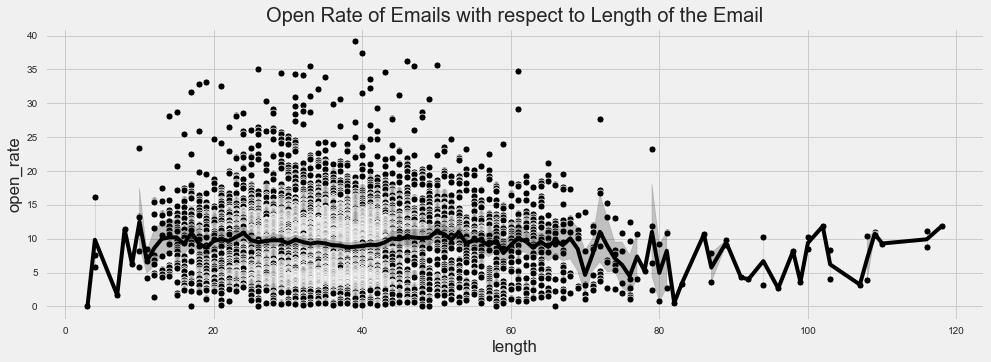

In [8]:
# lets check the effect of length of the suject with respect to the email subject

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.scatterplot(data['length'], data['open_rate'], color = 'black')
sns.lineplot(data['length'], data['open_rate'], color = 'black')
plt.title('Open Rate of Emails with respect to Length of the Email', fontsize = 20)
plt.show()

In [9]:
s = 'I am having a very nice day.'
len(s.split())

7

In [10]:
# lets create a feature containing the no. of words
data['no_of_words'] = data['email_subject'].apply(lambda x: len(x.split()))

# lets check the columns after creation of a new feature called the words count
data.head(2)

,email_subject,email_open_user_count,sent_user_count,open_rate,length,no_of_words
0,Can you smell what The Rock is cooking?,71550,182821,39.14,39,8
1,Go Monochrome! Shop Black & white shirts,90103,240445,37.47,40,7


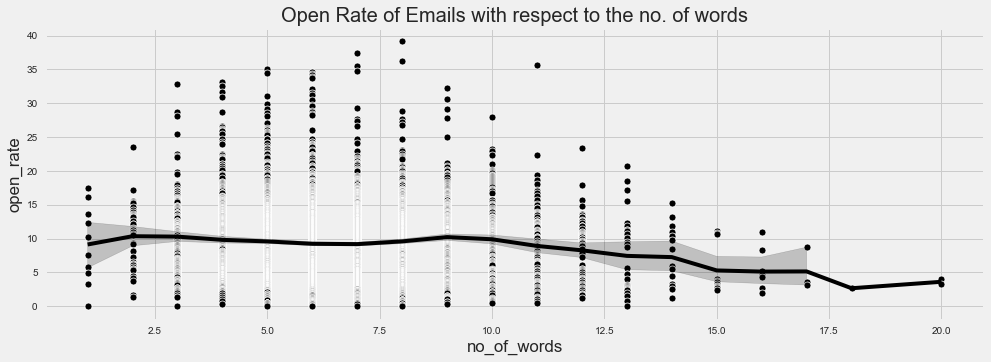

In [11]:
# lets check the effect of no of words of the suject with respect to the email subject

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.scatterplot(data['no_of_words'], data['open_rate'], color = 'black')
sns.lineplot(data['no_of_words'], data['open_rate'], color = 'black')
plt.title('Open Rate of Emails with respect to the no. of words', fontsize = 20)
plt.show()

In [12]:
# lets check the effect of opening rate of emails on the no. of words present in the subject of the email

@interact
def check(column = ['no_of_words','length']):
    x = data[[column,
      'open_rate']].groupby([column]).agg(['count',
                                                    'sum',
                                                    'max',
                                                    'min',
                                                    'mean']).style.background_gradient(cmap = 'Wistia')
    return x

interactive(children=(Dropdown(description='column', options=('no_of_words', 'length'), value='no_of_words'), …

## Data Analysis

In [16]:
# lets check the profile report
profile.ProfileReport(data)

Target looks like regression


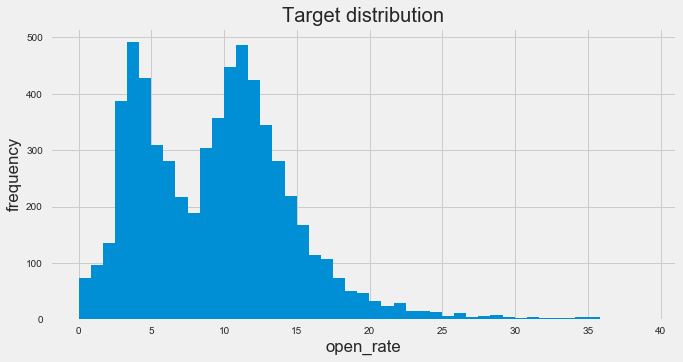

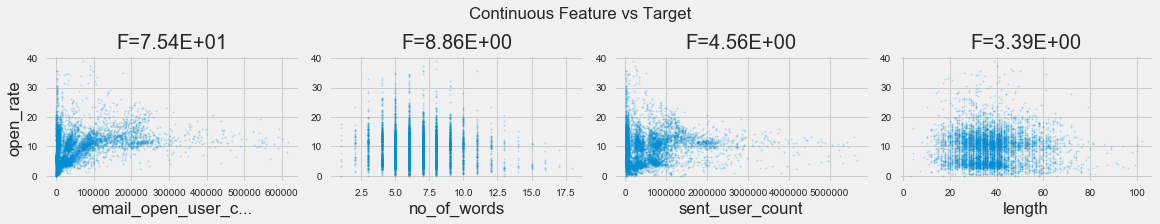

In [17]:
# lets compare the other features wrt to the target column
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'open_rate')

## Descriptive Statistics

### Central Tendency

In [13]:
# lets check the mean , median and mode of the numerical columns

@interact
def check(column = data.select_dtypes('number').columns):
    print("Mean :", data[column].mean())
    print("Median :", data[column].median())
    print("Mode :", data[column].mode()[0])

interactive(children=(Dropdown(description='column', options=('email_open_user_count', 'sent_user_count', 'ope…

### Spread of the Features

In [14]:
# lets check the Range, Standard Deviation and Variance of the Numerical Features

@interact
def check(column = data.select_dtypes('number').columns):
    range = (data[column].max() - data[column].min())
    print("Range :", range)
    print("Variance :", data[column].var())
    print("Standard Deviation :", data[column].std())

interactive(children=(Dropdown(description='column', options=('email_open_user_count', 'sent_user_count', 'ope…

### Correlation and Causation


In [15]:
# lets check the correlation and covariance

@interact
def check(column1 = list(data.select_dtypes('number').columns),
          column2 = list(data.select_dtypes('number').columns)[1:]):
    print("Correlation :", data[column1].corr(data[column2]))
    print("Covariance :", data[column1].cov(data[column2]))

interactive(children=(Dropdown(description='column1', options=('email_open_user_count', 'sent_user_count', 'op…

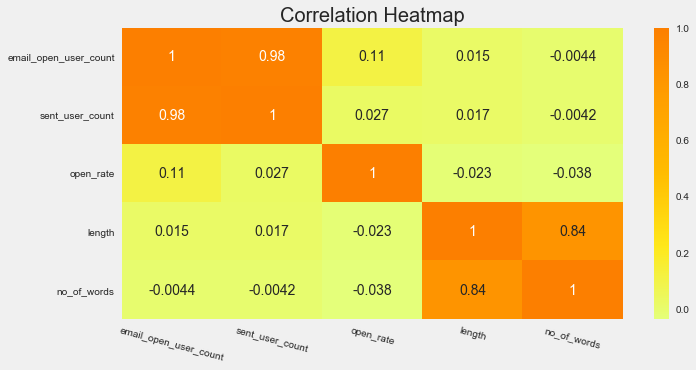

In [21]:
# lets check the correlation, covariance among the numerical features

# correlation
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('fivethirtyeight')

sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.xticks(rotation = 345)
plt.title('Correlation Heatmap', fontsize = 20)
plt.show()

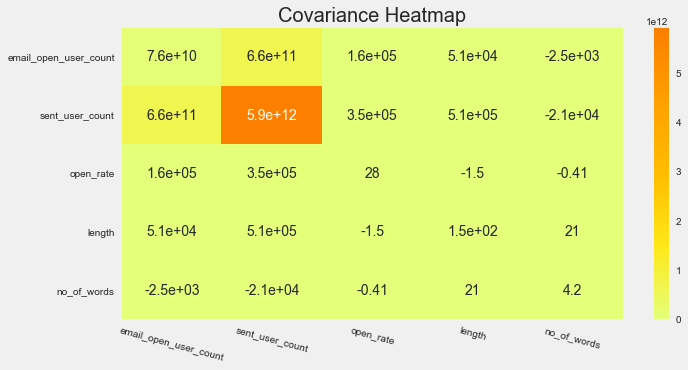

In [22]:
# covariance
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('fivethirtyeight')

sns.heatmap(data.cov(), annot = True, cmap = 'Wistia')
plt.xticks(rotation = 345)
plt.title('Covariance Heatmap', fontsize = 20)
plt.show()

## Inferential Statistics

### Probability Measure

In [23]:
# lets check the probability of an email subject being longer than 10 words and having opening rate more than 30%

data[(data['no_of_words'] >= 10) & (data['open_rate'] > 20)][['email_subject','open_rate',
                                                              'length']].style.background_gradient(cmap = 'PuBu')

,email_subject,open_rate,length
3,Hey Sharer! It's a brand new TV for you this time!,35.6,50
43,You're one step away from winning a Brand New TV,28,48
98,"{user_first_name}, Experience Extra 15% off on all orders! Only on updated app!",23.31,79
100,Casual trousers for work & Play! Fill those carts NOW!,23.2,54
108,"Play with lines , Get casual shirts | Free shipping",22.9,51
116,Start Working Out ! Upto 60% off on sport shoes,22.37,47
119,It's a win win: LR Gold Membership & so much more!,22.31,50
159,Casual shirts in solid hues! Min 40% - 60% off,21,46
167,"Buy 1 Get 2 FREE, price store or 80% Off + Free shipping",20.78,56
189,"Make a SOLID statement, shop kurtas at upto 80% off",20.19,51


In [24]:
# lets calculate the length of emails having that 30% opening rate and 10+ words in subject

x = data[(data['no_of_words'] >= 10) & (data['open_rate'] > 20)]
print("Number of Email Subject with more than 30% Opening Rate with more than or equal to 10 words :", len(x))

# Total Number of Emails
y = data.shape[0]
print("Total Number of Emails :", y)

# Probability of such mails having 30% opeining rate
probability = (len(x)/y)*100
print("The Probability of Having Such Mails is {0:.2f}%".format(probability))

Number of Email Subject with more than 30% Opening Rate with more than or equal to 10 words : 10
Total Number of Emails : 6232
The Probability of Having Such Mails is 0.16%


### Target Distribution

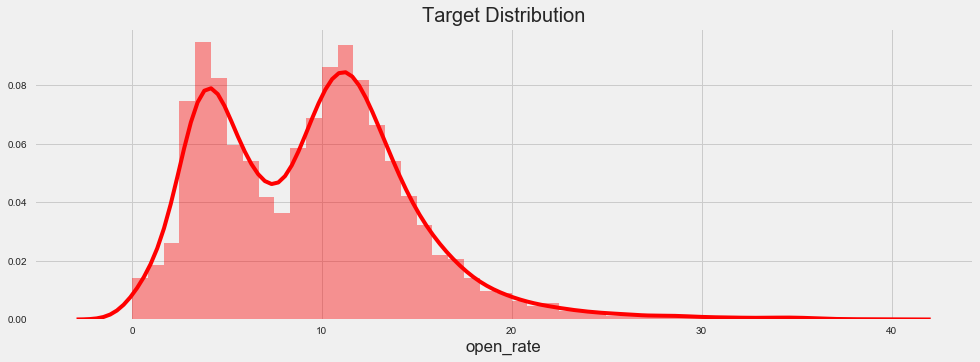

In [25]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.distplot(data['open_rate'], color = 'red')
plt.title('Target Distribution', fontsize = 20)
plt.show()

In [26]:
# lets check the shortest email subjects

data[(data['length'] < 10)][['email_subject',
                             'open_rate', 'length']].style.background_gradient(cmap = 'winter')

,email_subject,open_rate,length
549,....,16.11,4
2176,No email,11.37,8
3791,eqwe,7.61,4
4167,Open Now!,6.25,9
4313,#New,5.81,4
6060,You Win,1.68,7
6229,xyz,0,3


In [27]:
# lets check the longest email subjects

data[(data['length'] > 100)][['email_subject',
                             'open_rate', 'length']].style.background_gradient(cmap = 'bone')

,email_subject,open_rate,length
1917,Hi{user_first_name}! You have {lr_credits_available} cashback credits waiting in your account! buy something you love!,11.84,118
1923,Hi{user_first_name}! Save Rs {product_discount} on the {product_category} you just viewed! Only today!,11.83,102
2357,Hi{user_first_name}! Your {lr_credits_available} cashback credits will expire within 24 hours! Shop now to use them.,11.09,116
2449,You have a great choice {user_first_name}. {no_of_users_viewed} stylists have loved this product on Limeroad!,10.95,109
2612,"{user_first_name}, Did you know? {no_of_users_viewed} people are viewing this item right now. Don't lose out!",10.65,109
2668,Hi{user_first_name}! Did you know? this amazing {product_name} is available for only {product_selling_price}.,10.55,109
2753,Hi{user_first_name}! Save Rs.{product_discount} on the {product_category} you just viewed! Only valid today!,10.37,108
3259,Hi{user_first_name}! Did you know? This gorgeous {product_name} is available for only {product_selling_price}.,9.29,110
3492,{other_user_name} & {no_of_users_viewed} other people added this product to their cart in the last 5 minutes. Hurry!,8.73,116
3625,"{user_first_name}, 200 LR credits added to your account for today! Best time to complete your purchase!",8.31,103


In [28]:
data[['email_subject',
      'open_rate','length']].sort_values(['open_rate']).head(10).style.background_gradient(cmap = 'summer')

,email_subject,open_rate,length
6231,"Hi{user_first_name}, Shop Trending Layered Kurtas",0,49
6225,6 of your looks got loved!,0,26
6226,western high noon,0,17
6230,"{user_first_name}, Work ready kurtas at flat 399",0,48
6228,"Hi{user_first_name}, On-trend styles by Cobb! Flat 55% off",0,58
6227,3 of your looks got loved!,0,26
6229,xyz,0,3
6224,People loved your first look and are waiting to see more from you!,0.04,66
6223,The chance to preview new collection,0.16,36
6222,Shop At Min. 40% Off!,0.24,21


In [29]:
# lets check the email subjects having highest opening percentages

data[['email_subject','open_rate','length']].sort_values(['open_rate'],
                                                ascending = False).head(10).style.background_gradient(cmap = 'pink')

,email_subject,open_rate,length
0,Can you smell what The Rock is cooking?,39.14,39
1,Go Monochrome! Shop Black & white shirts,37.47,40
2,Dress up for work! Shop Office wear essentials,36.19,46
3,Hey Sharer! It's a brand new TV for you this time!,35.6,50
4,Trend Alert: Tropical Floral Kurtas for Monsoon,35.52,47
5,Here's how to win big in October!,35.5,33
6,Summer whites for hot days,35,26
7,"Hi{user_first_name}, Season's favourite Floral kurtas for you",34.76,61
8,We have something for you {user_first_name},34.61,43
9,🎀 Shop Our Bestselling Styles,34.47,29


## Data Visualization

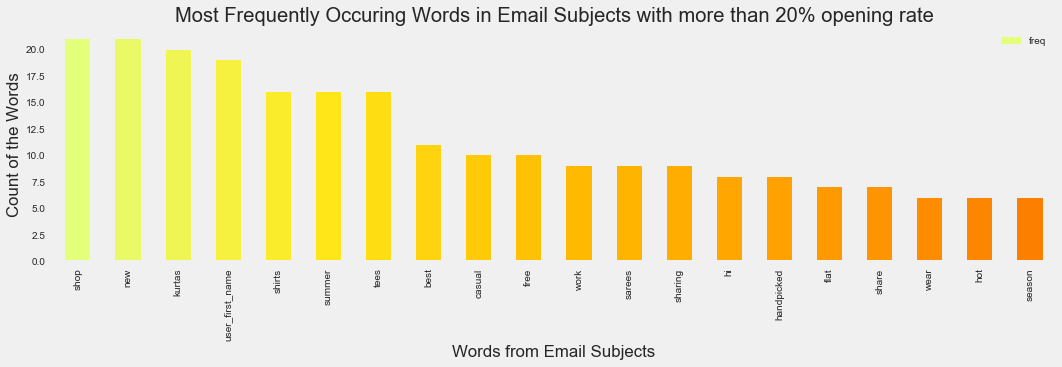

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

x = data[data['open_rate'] > 20]
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(x.email_subject)
sum_words = words.sum(axis=0)


words_freq_x = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_x = sorted(words_freq_x, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq_x, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.Wistia(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(16, 4), color = color)
plt.title("Most Frequently Occuring Words in Email Subjects with more than 20% opening rate")
plt.ylabel('Count of the Words')
plt.xlabel('Words from Email Subjects')
plt.grid()
plt.show()

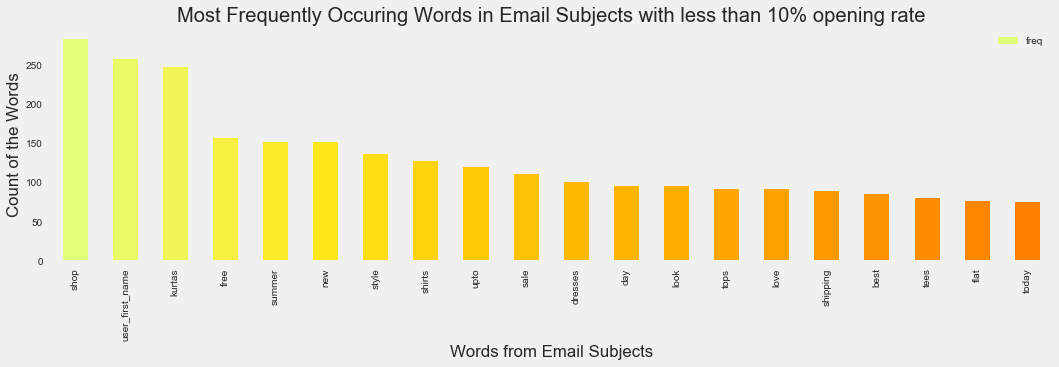

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

x = data[data['open_rate'] < 10]
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(x.email_subject)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.Wistia(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(16, 4), color = color)
plt.title("Most Frequently Occuring Words in Email Subjects with less than 10% opening rate")
plt.ylabel('Count of the Words')
plt.xlabel('Words from Email Subjects')
plt.grid()
plt.show()

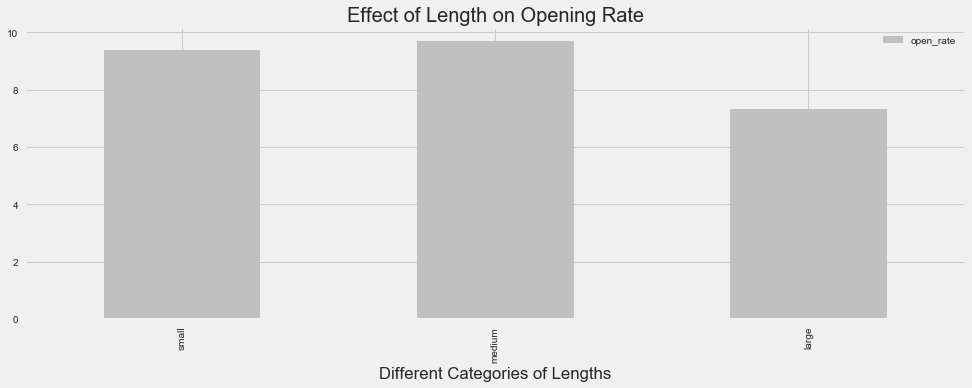

In [32]:
# lets divide the length in four categories 
data['length_category'] = pd.cut(data['length'], bins = 3, labels = ['small','medium','large'])

# now lets check the average email opening rate with all the new categories formed
data[['length_category',
      'open_rate']].groupby(['length_category']).agg('mean').plot(kind = 'bar', color = ['silver'])
plt.xlabel('Different Categories of Lengths')
plt.title('Effect of Length on Opening Rate', fontsize = 20)
plt.show()

In [33]:
data.columns

Index(['email_subject', 'email_open_user_count', 'sent_user_count',
       'open_rate', 'length', 'no_of_words', 'length_category'],
      dtype='object')

In [34]:
# lets check all the possible scatter plots

@interact_manual
def check(column = list(data.select_dtypes('number').columns),
          column2 = list(data.select_dtypes('number').columns[1:])):
    sns.scatterplot(data[column], data[column2])


interactive(children=(Dropdown(description='column', options=('email_open_user_count', 'sent_user_count', 'ope…

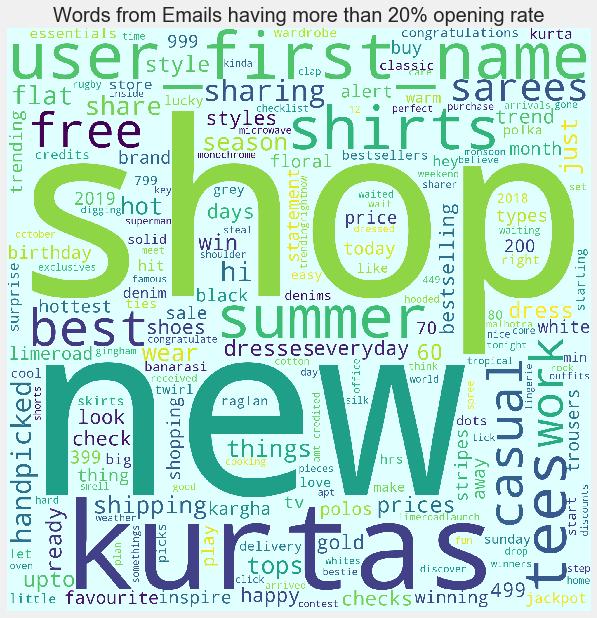

In [35]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', 
                      width = 2000,
                      height = 2000).generate_from_frequencies(dict(words_freq_x))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Words from Emails having more than 20% opening rate", fontsize = 20)
plt.show()

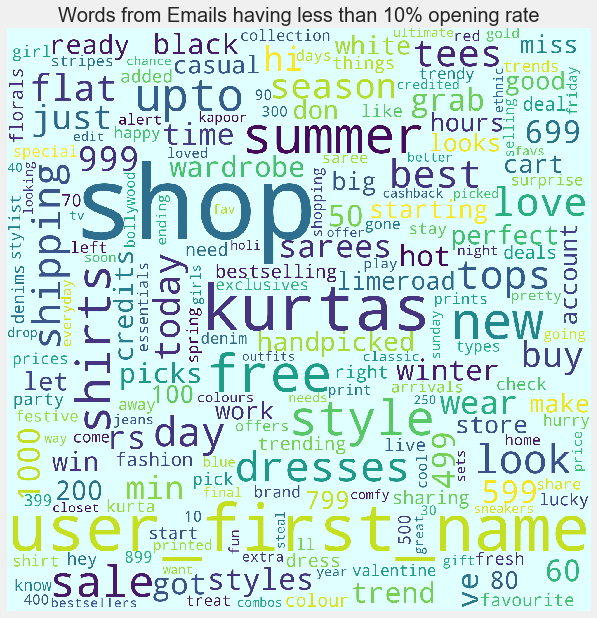

In [36]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 2000,
                      height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Words from Emails having less than 10% opening rate", fontsize = 20)
plt.show()

In [37]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Roshan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
data.shape

(6232, 7)

In [39]:
corpus = []

for i in range(0, 6232):
    review = re.sub('[^a-zA-Z]', ' ', data['email_subject'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
 

In [40]:
import spacy 
  
nlp = spacy.load('en_core_web_sm') 
x = " ".join(corpus)
doc = nlp(x) 

for ent in doc.ents: 
    print(ent.text," ", ent.label_) 

rock cook   PERSON
monochrom shop   PERSON
kurta monsoon   PERSON
first   ORDINAL
season   DATE
floral kurta someth   PERSON
first   ORDINAL
summer   DATE
readi sare   ORG
mani tee handpick happi   PERSON
kurta   GPE
limeroadlaunch   NORP
today   DATE
one   CARDINAL
new month   DATE
first   ORDINAL
lucki contest   PERSON
happi   GPE
tonight   TIME
handpick kurta   PERSON
rugbi   GPE
one   CARDINAL
sunday   DATE
microwav oven   PERSON
new summer   EVENT
summer   DATE
first   ORDINAL
kurta   GPE
last month   DATE
first   ORDINAL
summer   DATE
kurta   PERSON
kinda day bestsel sare   ORG
summer   DATE
hr lucki   PERSON
first   ORDINAL
winter season   DATE
new arriv   GPE
rani pink sare   ORG
kurta head   PERSON
kurta   GPE
one   CARDINAL
first   ORDINAL
kurta handpick   PERSON
chaturvedi sporti   PERSON
kurta   PERSON
first   ORDINAL
tuesday   DATE
first   ORDINAL
grey shawn   PERSON
today   DATE
worri   PERSON
sunday   DATE
deliveri dussehra   PERSON
first   ORDINAL
naughti knot   PERSON


happi cotton kurta   PERSON
first   ORDINAL
bhai bollywood   PERSON
tee handpick limefresh rakhi   FAC
kurta   PERSON
today   DATE
readi kurta   PERSON
versac perfum   PERSON
sania   GPE
kurta monsoon   PERSON
handpick kurta   PERSON
new trendi   ORG
babi kurta   PERSON
takeaway   PERSON
first   ORDINAL
kurta   GPE
diwali   PERSON
guy summer   DATE
day start   DATE
wear henley   ORG
day night   TIME
first   ORDINAL
kurta   PERSON
darl handpick   PERSON
friday   DATE
embroid kurta   PERSON
first   ORDINAL
first   ORDINAL
summer   DATE
one day   DATE
summer   DATE
first   ORDINAL
kurta   PERSON
someth   NORP
rajasthani   NORP
kurta   PERSON
kurta forgot lr   PERSON
handl bestsel min kurta   PERSON
tomorrow   DATE
first   ORDINAL
mandarin   PERSON
winter   DATE
kurta   GPE
kurta   PERSON
summer   DATE
night   TIME
first   ORDINAL
neck kurta   PERSON
kurta   PERSON
today   DATE
rayon kurta   PERSON
summer   DATE
first   ORDINAL
kurta   PERSON
wednesday   DATE
prettiest kurta   PERSON
anush

first   ORDINAL
kurta   PERSON
hour   TIME
sunni day   EVENT
mojito woah   PERSON
hu kurta   PERSON
comfi   PERSON
first   ORDINAL
kurta   GPE
summer   DATE
first   ORDINAL
first   ORDINAL
sunday   DATE
fav hurri   PERSON
chang casual   ORG
pari   NORP
first   ORDINAL
denim deepika   PERSON
winterwear time   ORG
carri   PRODUCT
summer   DATE
stylishli   ORG
kurta street   FAC
model surpris click   PRODUCT
first   ORDINAL
today   DATE
first   ORDINAL
trendi kurta   PERSON
rina walia rayon   PERSON
kurta   PERSON
summer   DATE
aww   CARDINAL
first   ORDINAL
min bestsel kurta   PRODUCT
min kurta   PERSON
kurta spring   PERSON
first   ORDINAL
first   ORDINAL
min menswear   PERSON
summer   DATE
denim wear   PERSON
everi day   DATE
first   ORDINAL
first   ORDINAL
handpick kurta   PERSON
today   DATE
summer   DATE
summer   DATE
holi bestsel kurta   ORG
first   ORDINAL
next date   DATE
aamir khan   PERSON
flirti   PERSON
indian   NORP
upto easi breezi   PERSON
first   ORDINAL
first   ORDINAL
s

quirk wardrob   PERSON
queen handpick kurta   PERSON
first   ORDINAL
deliv   PERSON
today   DATE
monday   DATE
upto kurta   PERSON
guy secret admir surpris tom   PERSON
summer   DATE
kurta   PERSON
wardrob   ORG
indian   NORP
desir star   PERSON
indian   NORP
treat kurta   PERSON
first   ORDINAL
one   CARDINAL
valentin day   FAC
creat big   ORG
kangana ranaut shirt buy shirt   ORG
sunday   DATE
first   ORDINAL
wardrob   DATE
bestsel kurta   PERSON
handpick kurta   PERSON
final hour cashback end hour   TIME
first   ORDINAL
kurta   PERSON
dhawan   PERSON
classi comfi kurta   PERSON
first   ORDINAL
first   ORDINAL
weekend   DATE
wednesday   DATE
ali khan   PERSON
kurta   PERSON
summer   DATE
mid month   DATE
indian   NORP
aamir khan   PERSON
khadi   GPE
first   ORDINAL
expert live hour   TIME
shahid kapoor   PERSON
min wardrob   WORK_OF_ART
first   ORDINAL
pathani kurta   PERSON
first   ORDINAL
sunday   DATE
surpris   PERSON
arriv first   PERSON
offici   PERSON
wardrob upgrad free ship fr

first   ORDINAL
first   ORDINAL
first day   DATE
today   DATE
first   ORDINAL
anarkali   NORP
first   ORDINAL
today   DATE
first   ORDINAL
purpl   GPE
us   GPE
first   ORDINAL
first   ORDINAL
jaw   ORG
minut   PERSON
first   ORDINAL
today   DATE
today   DATE
type kurta   PERSON
summer   DATE
first   ORDINAL
first   ORDINAL
hoursto   PERSON
first   ORDINAL
first   ORDINAL
first   ORDINAL
night   TIME
first   ORDINAL
saturday   DATE
chino   NORP
bestsel kurta   PERSON
first   ORDINAL
first   ORDINAL
first   ORDINAL
holi gift   ORG
first   ORDINAL
first   ORDINAL
indian   NORP
today   DATE
india   GPE
first   ORDINAL
first   ORDINAL
first   ORDINAL
midnight   TIME
first   ORDINAL
today   DATE
first   ORDINAL
today   DATE
first   ORDINAL
first   ORDINAL
first   ORDINAL
acc   ORG
onlin love season   PERSON
today   DATE
first   ORDINAL
first   ORDINAL
one   CARDINAL
first   ORDINAL
first   ORDINAL
first   ORDINAL
first   ORDINAL
first   ORDINAL
zodiac   LANGUAGE
first   ORDINAL
first   ORDIN

In [41]:
# lets count the total number of entities present in the email subjects

article = nlp(x)
len(article.ents)

2901

In [43]:
from collections import Counter
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'PERSON': 931,
         'ORDINAL': 544,
         'DATE': 702,
         'ORG': 250,
         'GPE': 156,
         'NORP': 87,
         'CARDINAL': 62,
         'TIME': 72,
         'EVENT': 36,
         'FAC': 21,
         'LANGUAGE': 10,
         'WORK_OF_ART': 7,
         'PRODUCT': 16,
         'LOC': 7})

spaCy supports the following entity types:
PERSON, NORP (nationalities, religious and political groups), FAC (buildings, airports etc.), ORG (organizations), GPE (countries, cities etc.), LOC (mountain ranges, water bodies etc.), PRODUCT (products), EVENT (event names), WORK_OF_ART (books, song titles), LAW (legal document titles), LANGUAGE (named languages), DATE, TIME, PERCENT, MONEY, QUANTITY, ORDINAL and CARDINAL.

In [44]:
items = [x.text for x in article.ents]
Counter(items).most_common(5)

[('first', 544),
 ('kurta', 248),
 ('summer', 208),
 ('today', 109),
 ('winter', 55)]

In [45]:
# total number of words
len(x)

148128

In [54]:
# creating a TF-IDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(max_features = 2000)

x = cv.fit_transform(corpus).toarray()
y = data['open_rate']

print(x.shape)
print(y.shape)

(6232, 2000)
(6232,)


In [55]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
# splitting into training and testing datasets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# lets print the shape of newly forned sets
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (4985, 2000)
Shape of x_test : (1247, 2000)
Shape of y_train : (4985,)
Shape of y_test : (1247,)


In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

print(pca.explained_variance_)

[0.02134069 0.01412288 0.0134162  0.01176989 0.01083257 0.00983121
 0.0091852  0.0088223  0.00852473 0.00840072]


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
r2 = r2_score(y_test, y_pred)
print(r2)

5.145431183490477
0.05698275095228911
